**Importing libraries**

In [ ]:
from sklearn.datasets import make_blobs #normally distribute pts. around specified center, return 2 arrays(co-ord,labels)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions
import time
import numpy as np

**Generating database**

In [ ]:
inputs, target = make_blobs(n_samples=1000,
                            centers  = [(-3,3),(0,0),(2,2)],
                            random_state=365)
# inputs=datapts, target=labels

In [ ]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [ ]:
data = pd.DataFrame(data=inputs, columns=['Feature1', 'Feature2'])
data['Target'] = target
data

,Feature1,Feature2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


**Plotting the database**

In [ ]:
knn_palette = sns.color_palette(['#000C1F','#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

<Axes: xlabel='Feature1', ylabel='Feature2'>

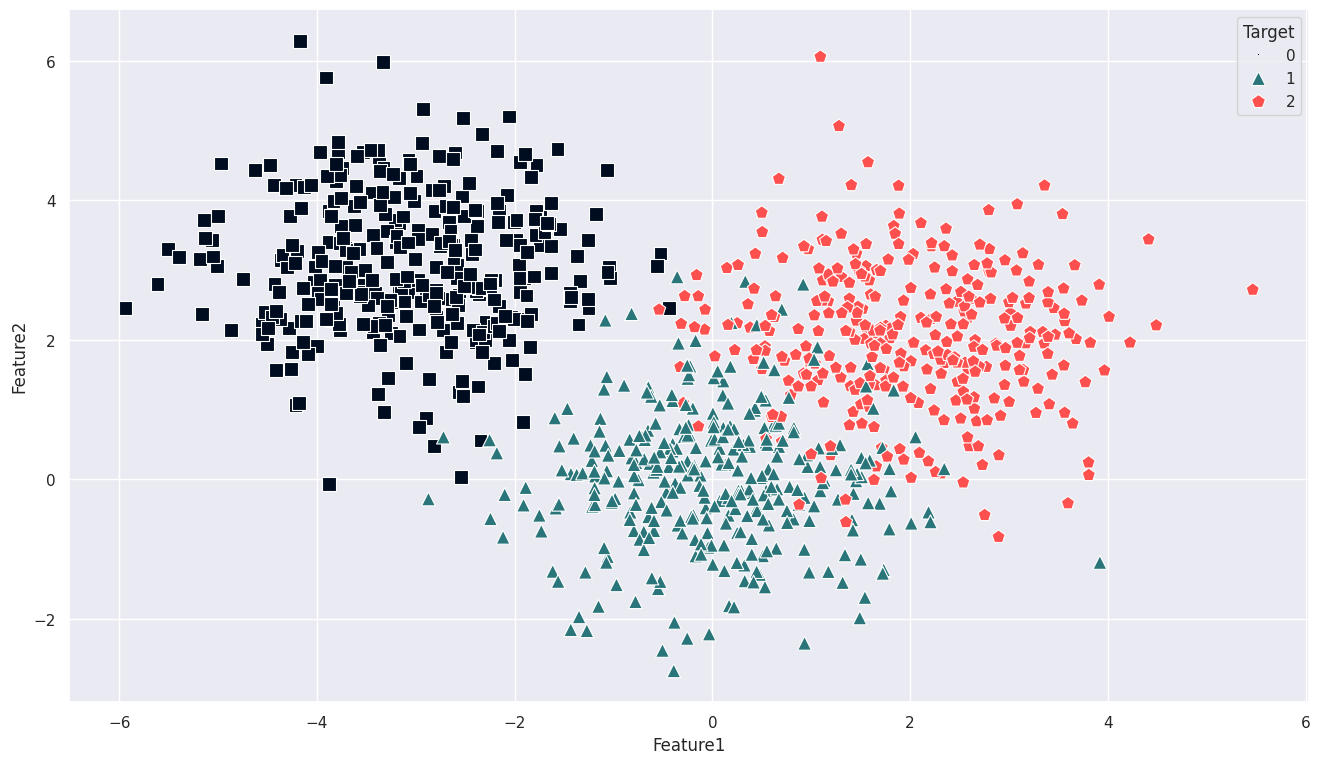

In [ ]:
sns.set()

plt.figure(figsize = (16,9))

sns.scatterplot(x='Feature1', y='Feature2',
                data = data,
                hue = 'Target', palette = knn_palette,
                markers=[',', '^', 'p'],
                style='Target',
                s=100)

**Visualizing the distribution of the points**

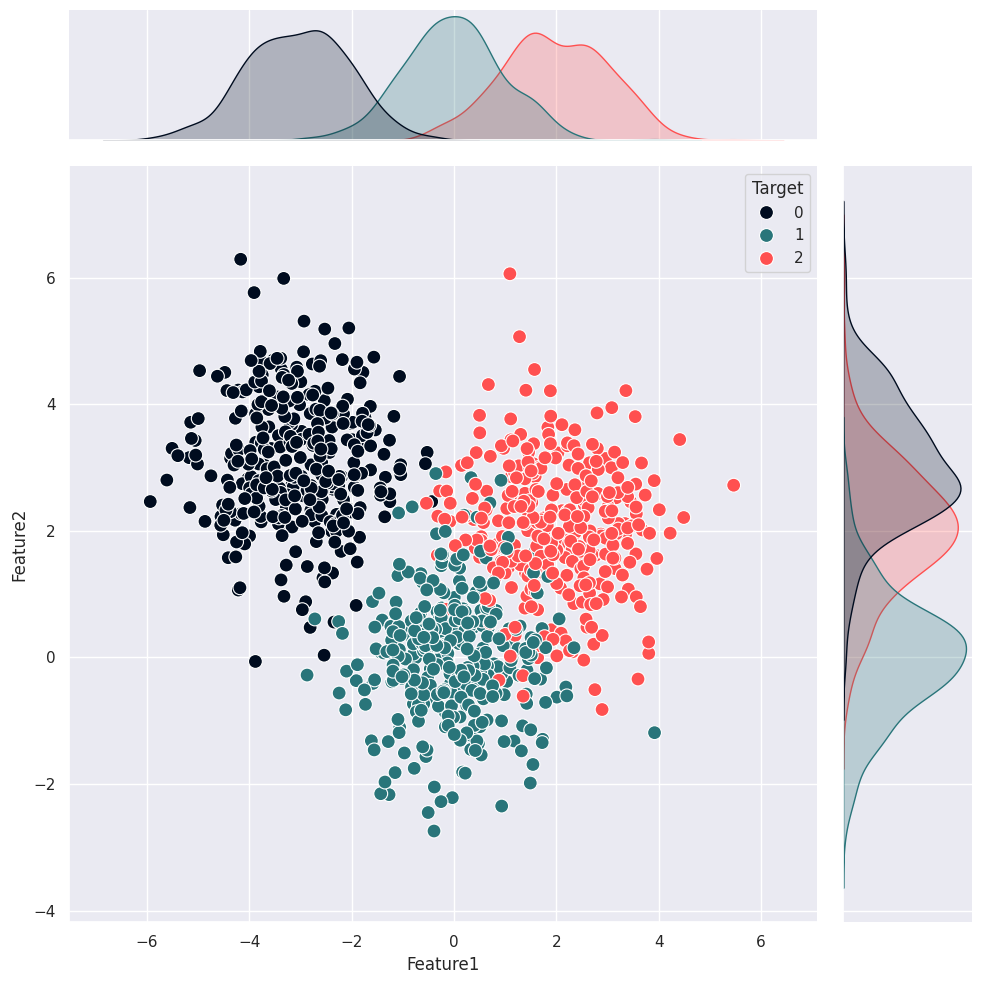

In [ ]:
# check normal distribution and centered at specific pt.
sns.set()

sns.jointplot(x='Feature1', y='Feature2',
                data = data,
                hue = 'Target', palette = knn_palette,
                height = 10,
                s=100,
              legend=True)

**Creating a train-test-split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify=target)

**Creating the model**

In [ ]:
clf = KNeighborsClassifier(n_neighbors =30, weights = 'distance')
# uniform weight improve performance
# default set to 5 in sklearn

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

**Predicting a sample**

In [ ]:
feature_1 = -0.18
feature_2 = 3.2

In [ ]:
clf.predict([[feature_1, feature_2]] )

array([2])

In [ ]:
neighbors = clf.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]]))

**Visualizing the neighbors**

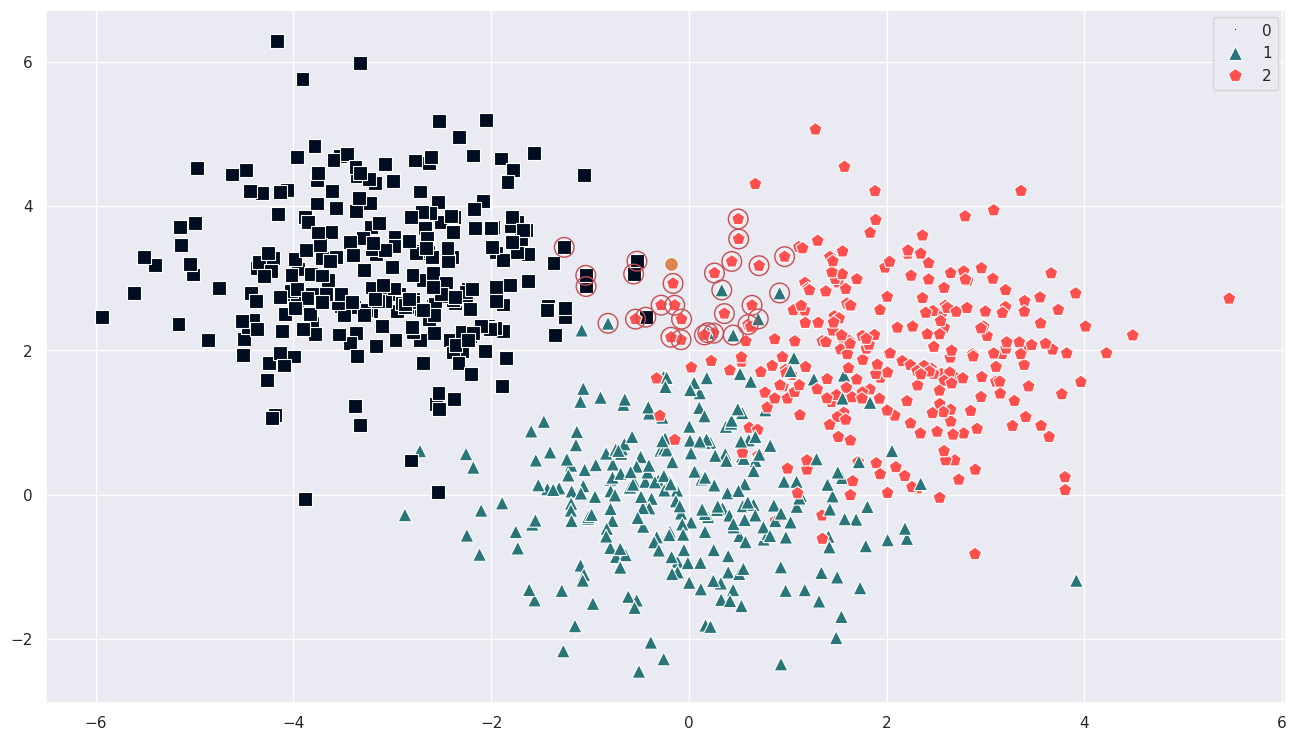

In [ ]:
sns.set()

plt.figure(figsize = (16,9))

sns.scatterplot(x=x_train[:,0], y=x_train[:,1],
                hue = y_train,
                palette = knn_palette,
                markers=[',', '^', 'p'],
                style=y_train,
                s=100,
                legend=True)

sns.scatterplot(x=[feature_1], y=[feature_2],
                markers=['o'],
                style=[feature_2],
                s=100,
                legend=False);

plot_x_train = []
plot_y_train = []

for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

plt.scatter(plot_x_train,
            plot_y_train,
            s=200, facecolors='none', edgecolors='r');

**Getting the parameters of the model**

In [ ]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

**Drawing the decision regions**

In [ ]:
x_train.shape

(800, 2)

Time elapsed: 14.5 seconds


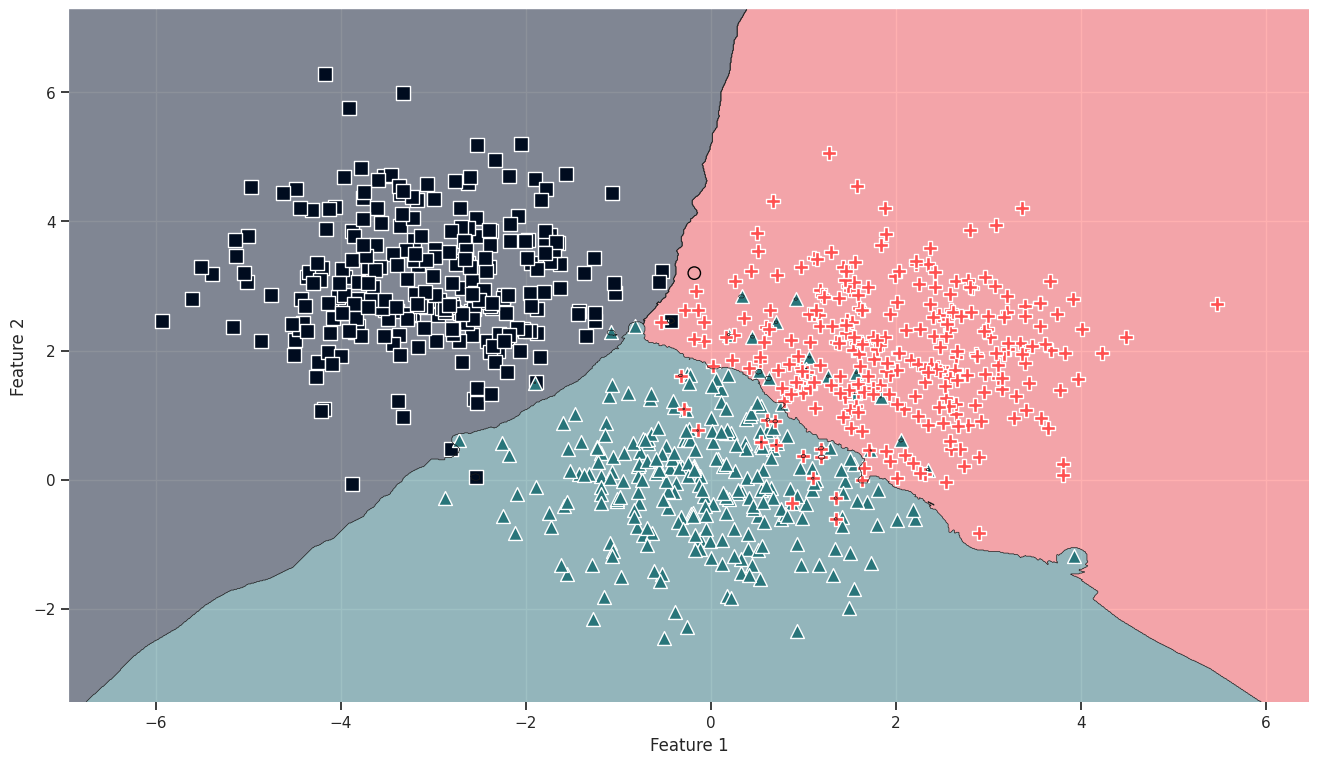

In [ ]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

In [ ]:
np.array([[feature_1, feature_2]]).shape

(1, 2)

**Getting the error rates of a set of modles**

In [ ]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:

    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))

    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

**Plotting the error rates as a function of the number of neighbors**

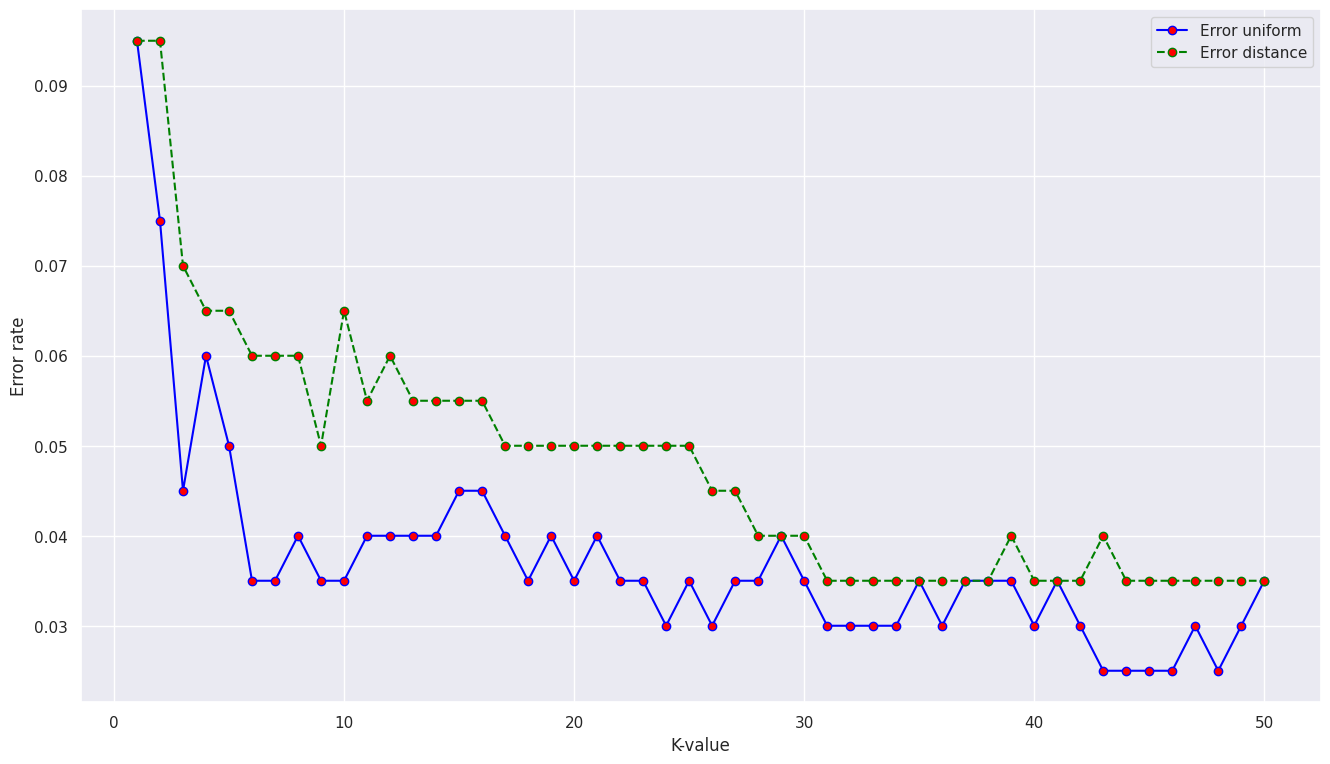

In [ ]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

**Choosing a set of parameters to test**

In [ ]:
parameters = {'n_neighbors':range(1, 51),
              'weights':['uniform', 'distance']}

**Create an instance of the GridSearchCV class**

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
clf = grid_search.best_estimator_

In [ ]:
clf

KNeighborsClassifier(n_neighbors=10)

In [ ]:
grid_search.best_score_

0.9512499999999999

**Make predictions on the test dataset**

In [ ]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

**Construct the confusion matrix**

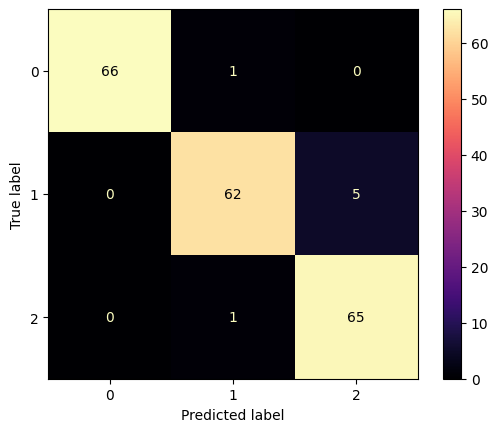

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

**Print out the classification report**

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

